In [21]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [12]:
dir_path = "/Users/macasotomoreira/Desktop/QuickDraw-Animals"
dir_path_train ="/Users/macasotomoreira/Desktop/QuickDraw-Animals/train_images"
dir_path_test ="/Users/macasotomoreira/Desktop/QuickDraw-Animals/test_images"

In [13]:
def load_save_data(input_name):
    y=[]
    files =[]
    with open(input_name) as f:
        for x in f:
            fila = x.split("\t")
            files.append(fila[0])
    return files

In [14]:
print(load_save_data("/Users/macasotomoreira/Desktop/QuickDraw-Animals/mapping.txt"))
etiquetas = load_save_data("/Users/macasotomoreira/Desktop/QuickDraw-Animals/mapping.txt")

['sheep', 'bear', 'bee', 'cat', 'camel', 'cow', 'crab', 'crocodile', 'duck', 'elephant', 'dog', 'giraffe']


In [15]:
label_to_idx = {label: i for i, label in enumerate(etiquetas)}
print(label_to_idx)

{'sheep': 0, 'bear': 1, 'bee': 2, 'cat': 3, 'camel': 4, 'cow': 5, 'crab': 6, 'crocodile': 7, 'duck': 8, 'elephant': 9, 'dog': 10, 'giraffe': 11}


In [16]:
images1 =[]
target1 =[]
images2 =[]
target2 =[]

In [17]:
def load_save_data(dir_path,etiquetas, output_name):
    images =[]
    target =[]
    for label in etiquetas:
        label_path = os.path.join(dir_path, label)
        for image_path in os.listdir(label_path):
                image = Image.open(os.path.join(label_path, image_path))
                image_array = np.array(image)/255
                images.append(image_array)
                target.append(label_to_idx[label])

    x = np.array(images)
    y = np.array(target)
    np.save(output_name + "_x.pny",x)
    np.save(output_name + "_y.pny",y)

In [18]:
load_save_data(dir_path_train,etiquetas,"train")
load_save_data(dir_path_test,etiquetas, "test")


In [19]:
x_train = np.load("/Users/macasotomoreira/Documents/train_x.pny.npy")
y_train= np.load("/Users/macasotomoreira/Documents/train_y.pny.npy")
x_test= np.load("/Users/macasotomoreira/Documents/test_x.pny.npy")
y_test= np.load("/Users/macasotomoreira/Documents/test_y.pny.npy")

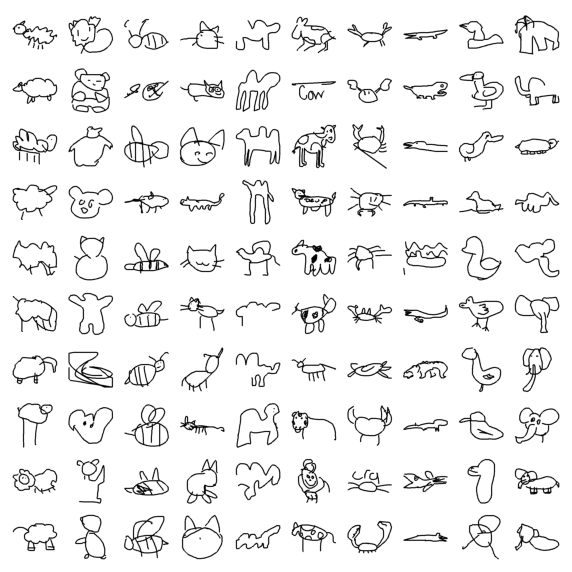

In [22]:
def visualize_classes():
    for i in range(0, 10):
        img_batch = x_train[y_train == i][0:10]
        img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
        if i > 0:
            img = np.concatenate([img, img_batch], axis = 1)
        else:
            img = img_batch
    plt.figure(figsize=(10,20))
    plt.axis('off')
    plt.imshow(img, cmap="gray")
    
visualize_classes()

In [23]:
print("{} {}".format(x_train.shape, x_train.dtype))
print("{} {}".format(y_train.shape, y_train.dtype))
print("{} {}".format(x_test.shape, x_test.dtype))
print("{} {}".format(y_test.shape, y_test.dtype))

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train1 = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

print("{} {}".format(x_train1.shape, x_train1.dtype))
print("{} {}".format(x_test1.shape, x_test1.dtype))

(12000, 256, 256) float64
(12000,) int64
(2399, 256, 256) float64
(2399,) int64
(12000, 256, 256, 1) float32
(2399, 256, 256, 1) float32
